In [1]:
import matplotlib.pyplot as plt

# Input module for process details
def get_process_input():
    num_processes = int(input("Enter the number of processes: "))
    processes = []
    
    for i in range(num_processes):
        pid = input(f"Enter PID for process {i+1}: ")
        arrival = int(input(f"Enter arrival time for process {pid}: "))
        burst = int(input(f"Enter burst time for process {pid}: "))
        
        # For Priority Scheduling, ask for the priority value
        priority = int(input(f"Enter priority for process {pid} (lower number means higher priority): "))
        
        processes.append({'PID': pid, 'arrival': arrival, 'burst': burst, 'priority': priority})
        
    return processes


In [2]:
# FCFS Scheduling Algorithm
def fcfs(processes):
    processes.sort(key=lambda x: x['arrival'])
    time = 0
    gantt = []
    stats = []

    for p in processes:
        start = max(time, p['arrival'])
        end = start + p['burst']
        waiting = start - p['arrival']
        tat = end - p['arrival']
        gantt.append((p['PID'], start, end))
        stats.append({'PID': p['PID'], 'Waiting': waiting, 'Turnaround': tat})
        time = end

    return gantt, stats

In [3]:
# SJF Scheduling Algorithm
def sjf(processes):
    ready = []
    time = 0
    gantt = []
    stats = []
    processes.sort(key=lambda x: x['arrival'])
    i = 0

    while i < len(processes) or ready:
        while i < len(processes) and processes[i]['arrival'] <= time:
            ready.append(processes[i])
            i += 1

        if ready:
            ready.sort(key=lambda x: x['burst'])
            p = ready.pop(0)
            start = time
            end = start + p['burst']
            waiting = start - p['arrival']
            tat = end - p['arrival']
            gantt.append((p['PID'], start, end))
            stats.append({'PID': p['PID'], 'Waiting': waiting, 'Turnaround': tat})
            time = end
        else:
            time = processes[i]['arrival']

    return gantt, stats


In [4]:
def round_robin(processes, quantum):
    queue = []
    time = 0
    gantt = []
    stats = {p['PID']: {'Waiting': 0, 'Last': p['arrival'], 'Remaining': p['burst'], 'Arrival': p['arrival']} for p in processes}
    processes.sort(key=lambda x: x['arrival'])
    i = 0

    while i < len(processes) or queue:
        while i < len(processes) and processes[i]['arrival'] <= time:
            queue.append(processes[i].copy())
            i += 1

        if queue:
            p = queue.pop(0)
            start = time
            execute = min(p['burst'], quantum)
            end = start + execute
            p['burst'] -= execute
            stats[p['PID']]['Waiting'] += start - stats[p['PID']]['Last']
            stats[p['PID']]['Last'] = end
            gantt.append((p['PID'], start, end))
            time = end
            if p['burst'] > 0:
                queue.append(p)
        else:
            time = processes[i]['arrival']

    results = []
    for pid, s in stats.items():
        results.append({'PID': pid, 'Waiting': s['Waiting'], 'Turnaround': s['Waiting'] + s['Remaining']})

    return gantt, results

In [5]:
# Priority Scheduling Algorithm
def priority_scheduling(processes):
    processes.sort(key=lambda x: (x['arrival'], x['priority']))
    time = 0
    gantt = []
    stats = []

    while processes:
        ready = [p for p in processes if p['arrival'] <= time]
        if ready:
            ready.sort(key=lambda x: (x['priority'], x['arrival']))
            p = ready.pop(0)
            start = time
            end = start + p['burst']
            waiting = start - p['arrival']
            tat = end - p['arrival']
            gantt.append((p['PID'], start, end))
            stats.append({'PID': p['PID'], 'Waiting': waiting, 'Turnaround': tat})
            time = end
            processes.remove(p)
        else:
            time = min(processes, key=lambda x: x['arrival'])['arrival']

    return gantt, stats

In [6]:
# Function to draw the Gantt chart
def draw_gantt(gantt):
    fig, ax = plt.subplots()
    for i, (pid, start, end) in enumerate(gantt):
        ax.broken_barh([(start, end - start)], (i * 10, 9), facecolors='tab:blue')
        ax.text((start + end) / 2, i * 10 + 4.5, pid, ha='center', va='center', color='white')
    ax.set_xlabel('Time')
    ax.set_yticks([])
    ax.set_title('Gantt Chart')
    plt.tight_layout()
    plt.show()

In [7]:
# Function to print metrics
def print_metrics(stats):
    total_waiting_time = sum([s['Waiting'] for s in stats])
    total_turnaround_time = sum([s['Turnaround'] for s in stats])
    num_processes = len(stats)
    print("\nMetrics:")
    print(f"Average Waiting Time: {total_waiting_time / num_processes:.2f}")
    print(f"Average Turnaround Time: {total_turnaround_time / num_processes:.2f}")
    

Enter the number of processes:  3
Enter PID for process 1:  1
Enter arrival time for process 1:  0
Enter burst time for process 1:  2
Enter priority for process 1 (lower number means higher priority):  3
Enter PID for process 2:  2
Enter arrival time for process 2:  2
Enter burst time for process 2:  3
Enter priority for process 2 (lower number means higher priority):  5
Enter PID for process 3:  3
Enter arrival time for process 3:  3
Enter burst time for process 3:  3
Enter priority for process 3 (lower number means higher priority):  3
Choose Scheduling Algorithm (FCFS, SJF, RR, Priority):  FCFS


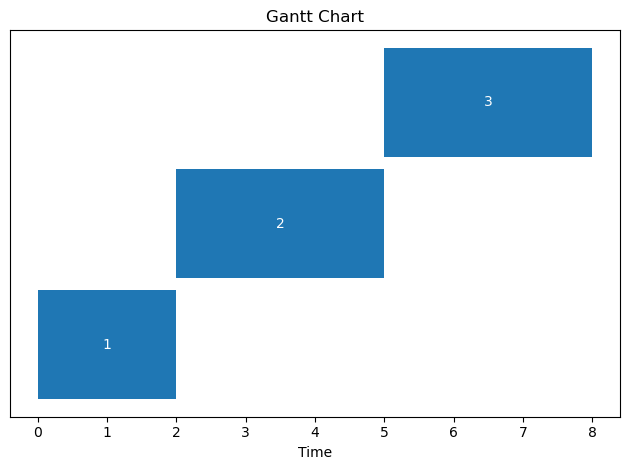


Metrics:
Average Waiting Time: 0.67
Average Turnaround Time: 3.33


In [8]:
# Main program
if __name__ == "__main__":
    processes = get_process_input()
    
    # Ask the user to choose an algorithm
    algorithm = input("Choose Scheduling Algorithm (FCFS, SJF, RR, Priority): ").strip().lower()
    if algorithm == 'rr':
        quantum = int(input("Enter the quantum time for Round Robin: "))
        gantt, stats = round_robin(processes, quantum)
    elif algorithm == 'fcfs':
        gantt, stats = fcfs(processes)
    elif algorithm == 'sjf':
        gantt, stats = sjf(processes)
    elif algorithm == 'priority':
        gantt, stats = priority_scheduling(processes)
    else:
        print("Invalid algorithm choice!")
        exit()

    # Display results
    draw_gantt(gantt)
    print_metrics(stats)